In [1]:
import pandas as pd 
import numpy as np 
import missingno as msno
#churn_raw_data = pd.read_csv ('/Users/jasminemoniquecooper/Downloads/churn_raw_data.csv')
pd.set_option('display.max_columns', None)
churn_raw_data.head(10)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5
5,6,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,-83.89040,17701,Urban,America/New_York,Chief Technology Officer,3.0,83.0,No Schooling Completed,Full Time,NaN,Never Married,Female,No,7.814859,15,3,1,No,One year,Yes,No,None,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Electronic Check,7.000994,184.401558,1039.357983,3,3,3,2,4,3,3,3
6,7,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43420,-84.27892,2535,Suburban,America/New_York,"Surveyor, hydrographic",0.0,NaN,Associate's Degree,Full Time,11467.50,Widowed,Male,Yes,11.129094,10,0,1,Yes,Month-to-month,No,No,DSL,Yes,No,No,No,No,Yes,Yes,Yes,No,Electronic Check,13.236774,200.064886,1907.242972,6,5,6,4,1,5,5,5
7,8,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,23144,Suburban,America/Chicago,Sales promotion account executive,2.0,NaN,Bachelor's Degree,Full Time,26759.64,Married,Female,Yes,7.594838,16,0,0,Yes,Month-to-month,No,No,DSL,No,No,No,Yes,No,No,No,No,Yes,Mailed Check,NaN,114.754111,979.612708,2,2,2,5,2,3,4,5
8,9,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,17351,Suburban,America/New_York,Teaching laboratory technician,2.0,49.0,"Some College, Less than 1 Year",Full Time,58634.51,Separated,Prefer not to answer,No,6.637259,20,2,3,NaN,Month-to-month,Yes,No,DSL,Yes,No,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),8.220686,118.366844,1312.874964,5,4,4,3,4,3,4,4
9,10,10,I676080,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,Cincinnati,OH,Hamilton,45237,39.19296,-84.45230,20193,Rural,America/New_York,Museum education officer,NaN,86.0,GED or Alternative Credential,Full Time,50231.40,M

In [2]:
churn_raw_data.dtypes

Unnamed: 0                int64
CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone   

In [3]:
churn_raw_data.describe()

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [4]:
churn_duplicates = churn_raw_data.duplicated()
churn_raw_data[churn_duplicates]

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


In [5]:
churn_raw_data.isna().sum()
#overall summary of missing data in the data frame 

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

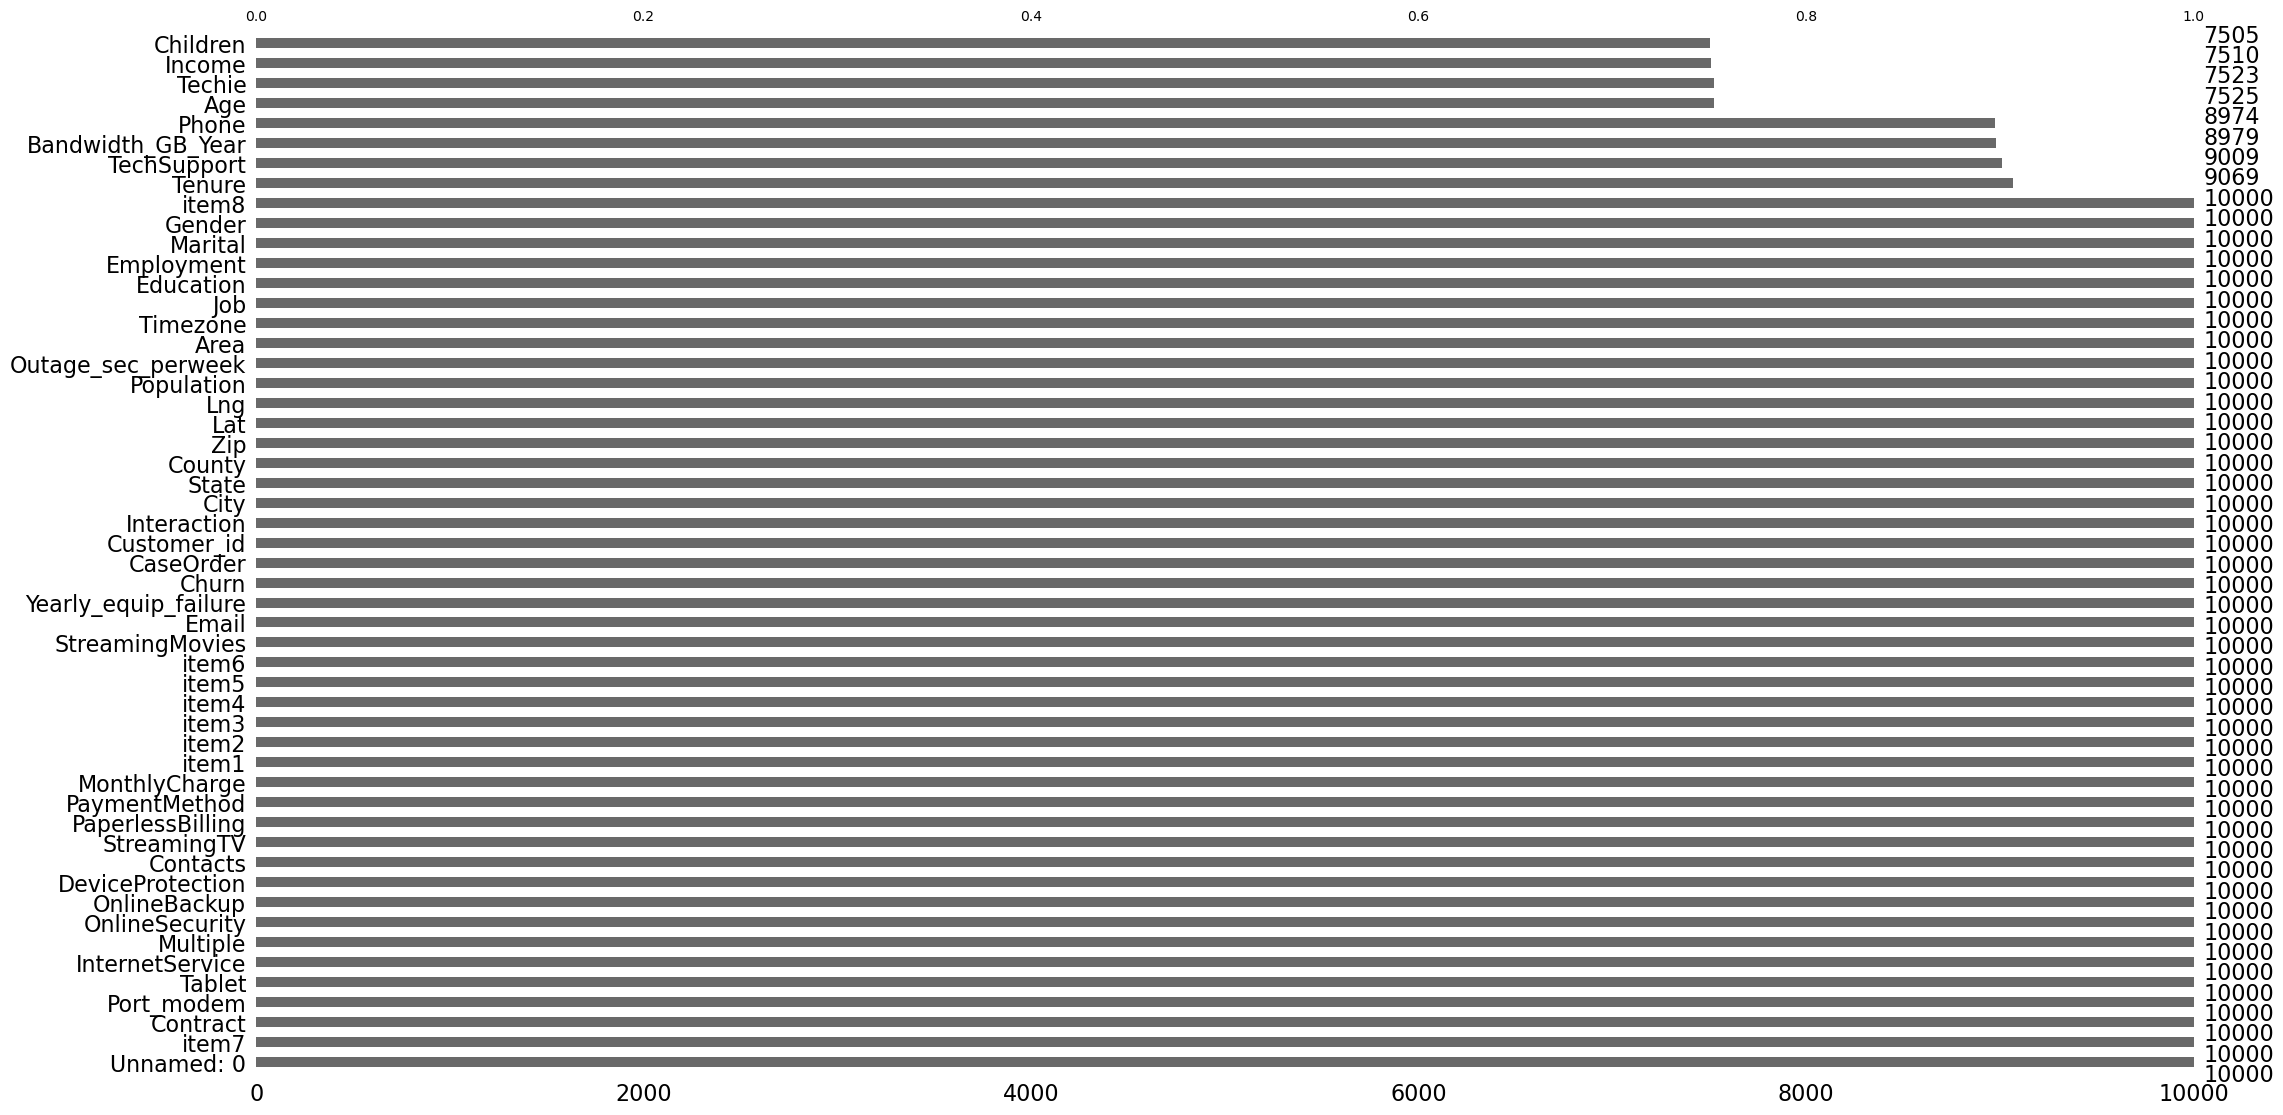

In [6]:
#visualize missingness 
import matplotlib.pyplot as plt
column_order = churn_raw_data.isnull().sum().sort_values().index
msno.bar(churn_raw_data[column_order])
plt.show()

/var/folders/z3/gvw2prhn0vn4667sjbjhdj_h0000gn/T/ipykernel_884/1568731752.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = churn_raw_data.corr()


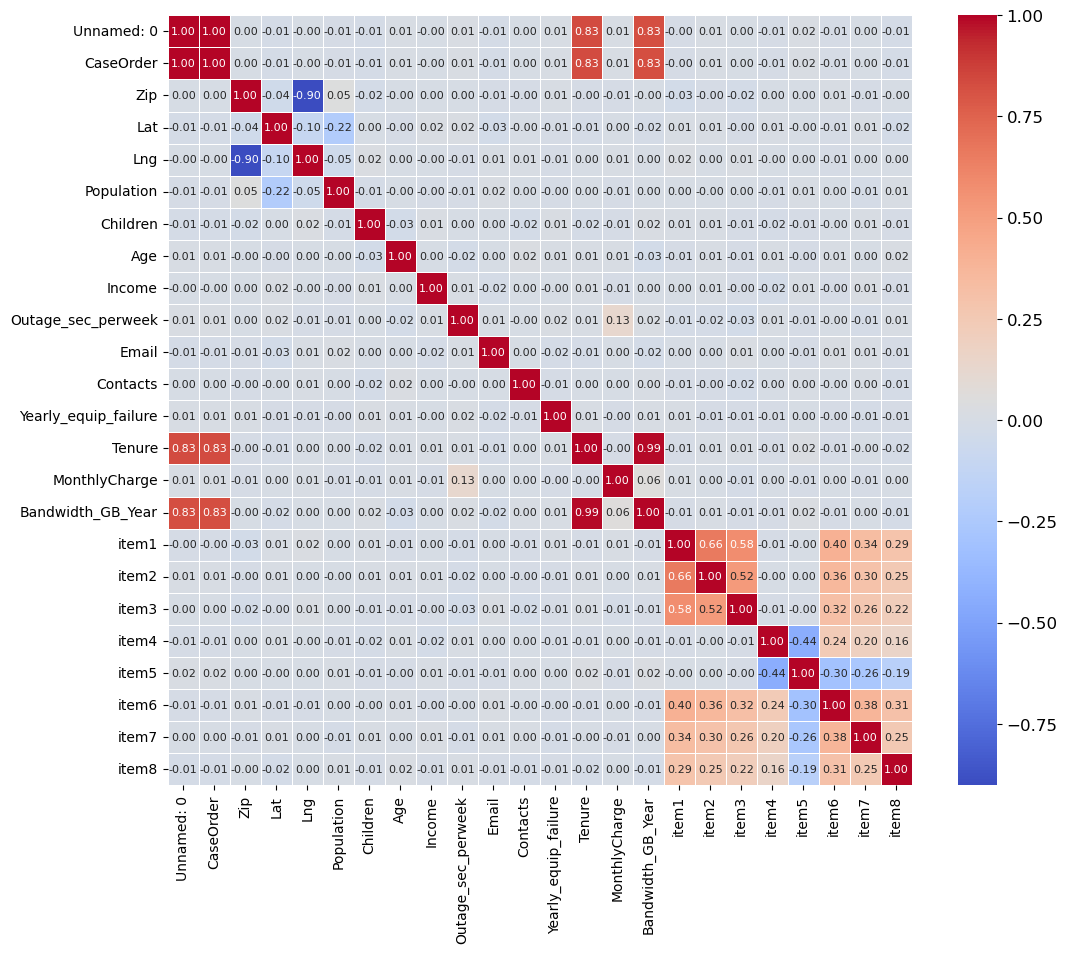

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a correlation matrix
correlation_matrix = churn_raw_data.corr()

# Set the figure size to make the heatmap larger
plt.figure(figsize=(12, 10))

# Create a heat map using seaborn with customizations
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})

# Increase the font size of the color bar (optional)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

# Increase the font size of the annotations
for text in heatmap.texts:
    text.set_size(8)

# Display the heat map
plt.show()


In [8]:
churn_raw_data.Population[churn_raw_data.Population == 0].count()

97

In [9]:
# Count missing values in the 'Age' column
missing_age_count = churn_raw_data['Age'].isna().sum()
print(missing_age_count)

2475


In [10]:
#determine if missing income values are related to employment 

# Select the rows where income is missing
missing_income = churn_raw_data[churn_raw_data['Income'].isnull()]

# Group the missing income data by employment status
grouped = missing_income.groupby(['Employment'])

# Count the number of missing income values for each employment status
missing_count = grouped.size()

# Calculate the percentage of missing income values for each employment status
percentage_missing = missing_count / churn_raw_data.groupby(['Employment']).size() * 100

# Display the results
print(percentage_missing)

Employment
Full Time     24.799733
Part Time     27.351248
Retired       25.717112
Student       24.377593
Unemployed    22.603431
dtype: float64


In [11]:
#determine if missing income values are related to employment and age 

# Select the rows where income is missing
missing_income = churn_raw_data[churn_raw_data['Income'].isnull()]

# Group the missing income data by employment status
grouped = missing_income.groupby(['Employment', pd.cut(missing_income['Age'], bins=[0, 18, 30, 50, np.inf])])

# Count the number of missing income values for each employment status
missing_count = grouped.size()

# Calculate the percentage of missing income values for each employment status
percentage_missing = missing_count / churn_raw_data.groupby(['Employment', pd.cut(churn_raw_data['Age'], bins=[0, 18, 30, 50, np.inf])]).size() * 100

# Display the results
print(percentage_missing)

#part time employment between ages 0-18 is missing data the most 

Employment  Age         
Full Time   (0.0, 18.0]     28.846154
            (18.0, 30.0]    24.841572
            (30.0, 50.0]    23.771152
            (50.0, inf]     24.626866
Part Time   (0.0, 18.0]     45.454545
            (18.0, 30.0]    22.388060
            (30.0, 50.0]    30.000000
            (50.0, inf]     26.540284
Retired     (0.0, 18.0]     33.333333
            (18.0, 30.0]    22.131148
            (30.0, 50.0]    24.170616
            (50.0, inf]     26.354680
Student     (0.0, 18.0]      0.000000
            (18.0, 30.0]    22.400000
            (30.0, 50.0]    28.571429
            (50.0, inf]     23.173804
Unemployed  (0.0, 18.0]      9.090909
            (18.0, 30.0]    25.757576
            (30.0, 50.0]    27.184466
            (50.0, inf]     21.957041
dtype: float64


In [12]:
import pandas as pd

# Select the rows where the 'Techie' column is null
missing_techie = churn_raw_data[churn_raw_data['Techie'].isnull()]

# Define age group bins
age_bins = [18, 30, 50, float('inf')]  

# Group the missing 'Techie' data by age
grouped = missing_techie.groupby(pd.cut(missing_techie['Age'], bins=age_bins))

# Count the number of missing 'Techie' values for each age group
missing_count = grouped.size()

# Calculate the percentage of missing 'Techie' values for each age group
total_count_by_age_group = churn_raw_data.groupby(pd.cut(churn_raw_data['Age'], bins=age_bins)).size()
percentage_missing = (missing_count / total_count_by_age_group) * 100

# Display the results
print(percentage_missing)


Age
(18.0, 30.0]    24.731183
(30.0, 50.0]    24.891671
(50.0, inf]     24.605523
dtype: float64


In [13]:
import pandas as pd

# Select the rows where 'number of children' is missing
missing_children = churn_raw_data[churn_raw_data['Children'].isnull()]

# Define age group bins
age_bins = [18, 30, 50, float('inf')]  # Adjust the bins as needed

# Group the missing 'number of children' data by marital status and age
grouped = missing_children.groupby(['Marital', pd.cut(missing_children['Age'], bins=age_bins)])

# Count the number of missing 'number of children' values for each marital status and age group
missing_count = grouped.size()

# Calculate the percentage of missing 'number of children' values for each marital status and age group
total_count_by_group = churn_raw_data.groupby(['Marital', pd.cut(churn_raw_data['Age'], bins=age_bins)]).size()
percentage_missing = (missing_count / total_count_by_group) * 100

# Display the results
print(percentage_missing)


Marital        Age         
Divorced       (18.0, 30.0]    26.007326
               (30.0, 50.0]    26.365796
               (50.0, inf]     23.684211
Married        (18.0, 30.0]    23.750000
               (30.0, 50.0]    22.513089
               (50.0, inf]     25.447570
Never Married  (18.0, 30.0]    27.343750
               (30.0, 50.0]    22.906404
               (50.0, inf]     24.936387
Separated      (18.0, 30.0]    24.809160
               (30.0, 50.0]    27.640449
               (50.0, inf]     24.782067
Widowed        (18.0, 30.0]    28.044280
               (30.0, 50.0]    21.513002
               (50.0, inf]     25.030826
dtype: float64


In [14]:
import numpy as np
churn_raw_data.loc[churn_raw_data.Population == 0, 'Population'] = np.nan
churn_raw_data.Population[np.isnan(churn_raw_data.Population)]

13     NaN
422    NaN
428    NaN
434    NaN
446    NaN
        ..
9216   NaN
9441   NaN
9657   NaN
9702   NaN
9944   NaN
Name: Population, Length: 97, dtype: float64

In [15]:
pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.


In [16]:
from fancyimpute import KNN

columns_to_impute = ['Children', 'Income', 'Age', 'Bandwidth_GB_Year', 'Population', 'Tenure']

# Create an instance of the KNN imputer
knn_imputer = KNN()

# Get the column indices of the columns to impute
columns_to_impute_indices = [churn_raw_data.columns.get_loc(col) for col in columns_to_impute]

# Perform imputation on the selected columns
imputed_values = knn_imputer.fit_transform(churn_raw_data.iloc[:, columns_to_impute_indices])

# Assign the imputed values back to the original dataset
churn_raw_data.iloc[:, columns_to_impute_indices] = imputed_values

# Verify if the imputations are in the original dataset
print(churn_raw_data.head())

Imputing row 1/10000 with 1 missing, elapsed time: 17.602
Imputing row 101/10000 with 1 missing, elapsed time: 17.611
Imputing row 201/10000 with 1 missing, elapsed time: 17.621
Imputing row 301/10000 with 2 missing, elapsed time: 17.630
Imputing row 401/10000 with 1 missing, elapsed time: 17.639
Imputing row 501/10000 with 1 missing, elapsed time: 17.645
Imputing row 601/10000 with 0 missing, elapsed time: 17.655
Imputing row 701/10000 with 0 missing, elapsed time: 17.661
Imputing row 801/10000 with 0 missing, elapsed time: 17.671
Imputing row 901/10000 with 0 missing, elapsed time: 17.678
Imputing row 1001/10000 with 0 missing, elapsed time: 17.689
Imputing row 1101/10000 with 0 missing, elapsed time: 17.699
Imputing row 1201/10000 with 2 missing, elapsed time: 17.707
Imputing row 1301/10000 with 1 missing, elapsed time: 17.715
Imputing row 1401/10000 with 1 missing, elapsed time: 17.723
Imputing row 1501/10000 with 1 missing, elapsed time: 17.732
Imputing row 1601/10000 with 1 missi

In [17]:
from sklearn.impute import SimpleImputer

column_to_impute_two = ['Techie', 'Phone', 'TechSupport']

# Create the SimpleImputer object with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the categorical variables using the imputer
churn_raw_data[column_to_impute_two] = imputer.fit_transform(churn_raw_data[column_to_impute_two])

In [18]:
churn_raw_data['Techie'].isna().sum()

0

In [19]:
import pandas as pd

# Define age group bins
age_bins = [18, 30, 50, float('inf')]

# Group the data by age
grouped = churn_raw_data.groupby(pd.cut(churn_raw_data['Age'], bins=age_bins))

# Count the number of 'Techie' values for each age group
tech_count = grouped['Techie'].value_counts().unstack(fill_value=0)

# Calculate the percentage of 'Techie' values for each age group
tech_percentage = (tech_count / tech_count.sum(axis=1).values[:, None]) * 100

# Display the results
print(tech_percentage)


Techie               No        Yes
Age                               
(18.0, 30.0]  85.887097  14.112903
(30.0, 50.0]  87.026087  12.973913
(50.0, inf]   88.011538  11.988462


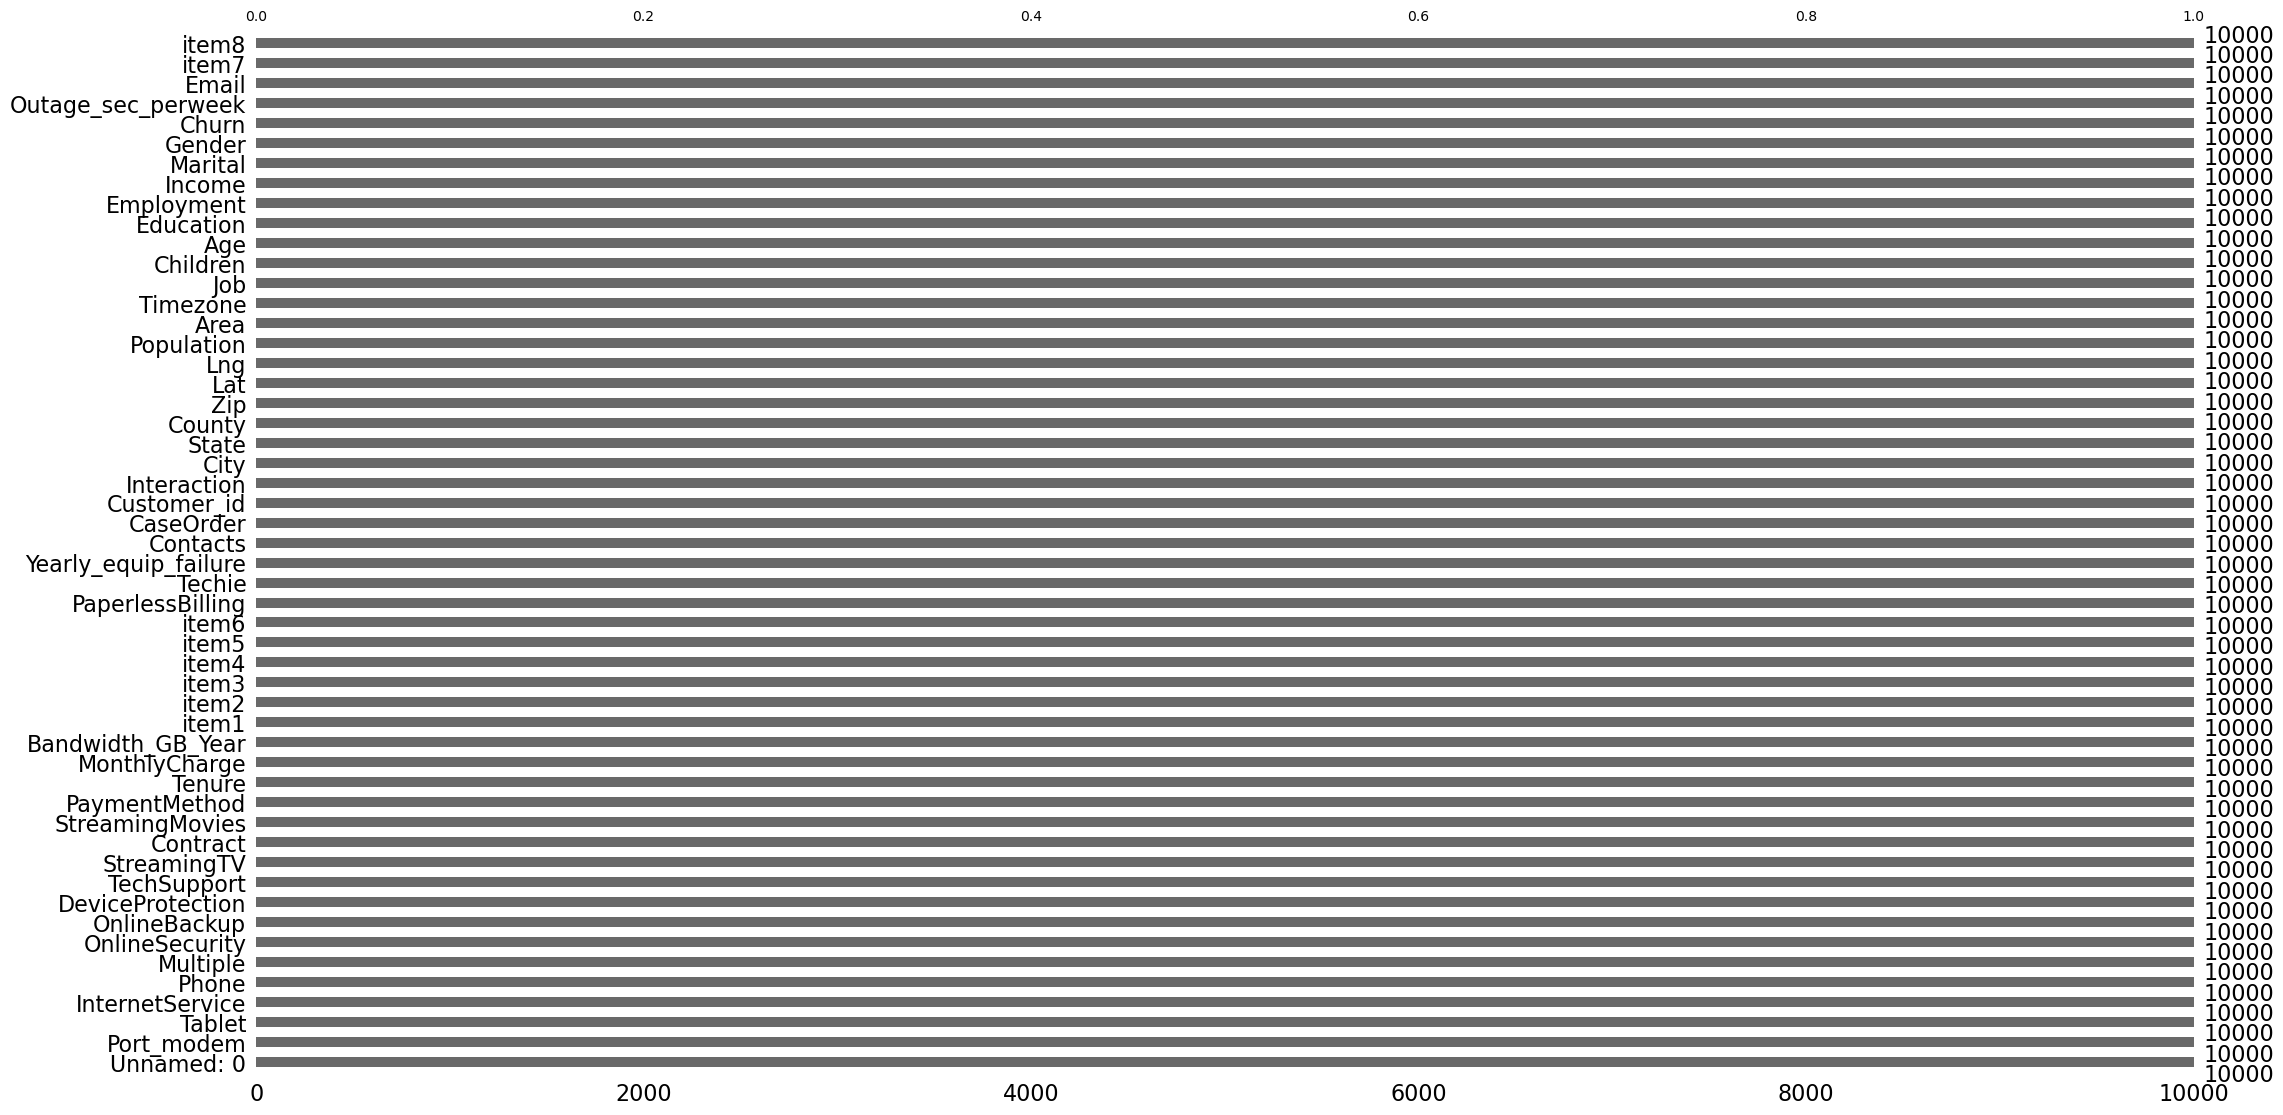

In [20]:
#data clean 
import matplotlib.pyplot as plt 
column_order = churn_raw_data.isnull().sum().sort_values().index
msno.bar(churn_raw_data[column_order])
plt.show()

In [21]:
cleaned_data_two = churn_raw_data
new_name_two = 'churn_cleaned_data'
new_cleaned_data_two = cleaned_data_two.copy()
new_cleaned_data_two.name = new_name_two
new_cleaned_data_two.to_csv('new_cleaned_data_two.csv', index=False)
churn_raw_data.to_csv(r'/Users/jasminemoniquecooper/Downloads/new_cleaned_data_two.csv')

In [22]:
# Rename the DataFrame to churn_clean_data
churn_clean_data = new_cleaned_data_two.copy()
print(churn_clean_data)


      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9996       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9998       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9999       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999       10000      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State   

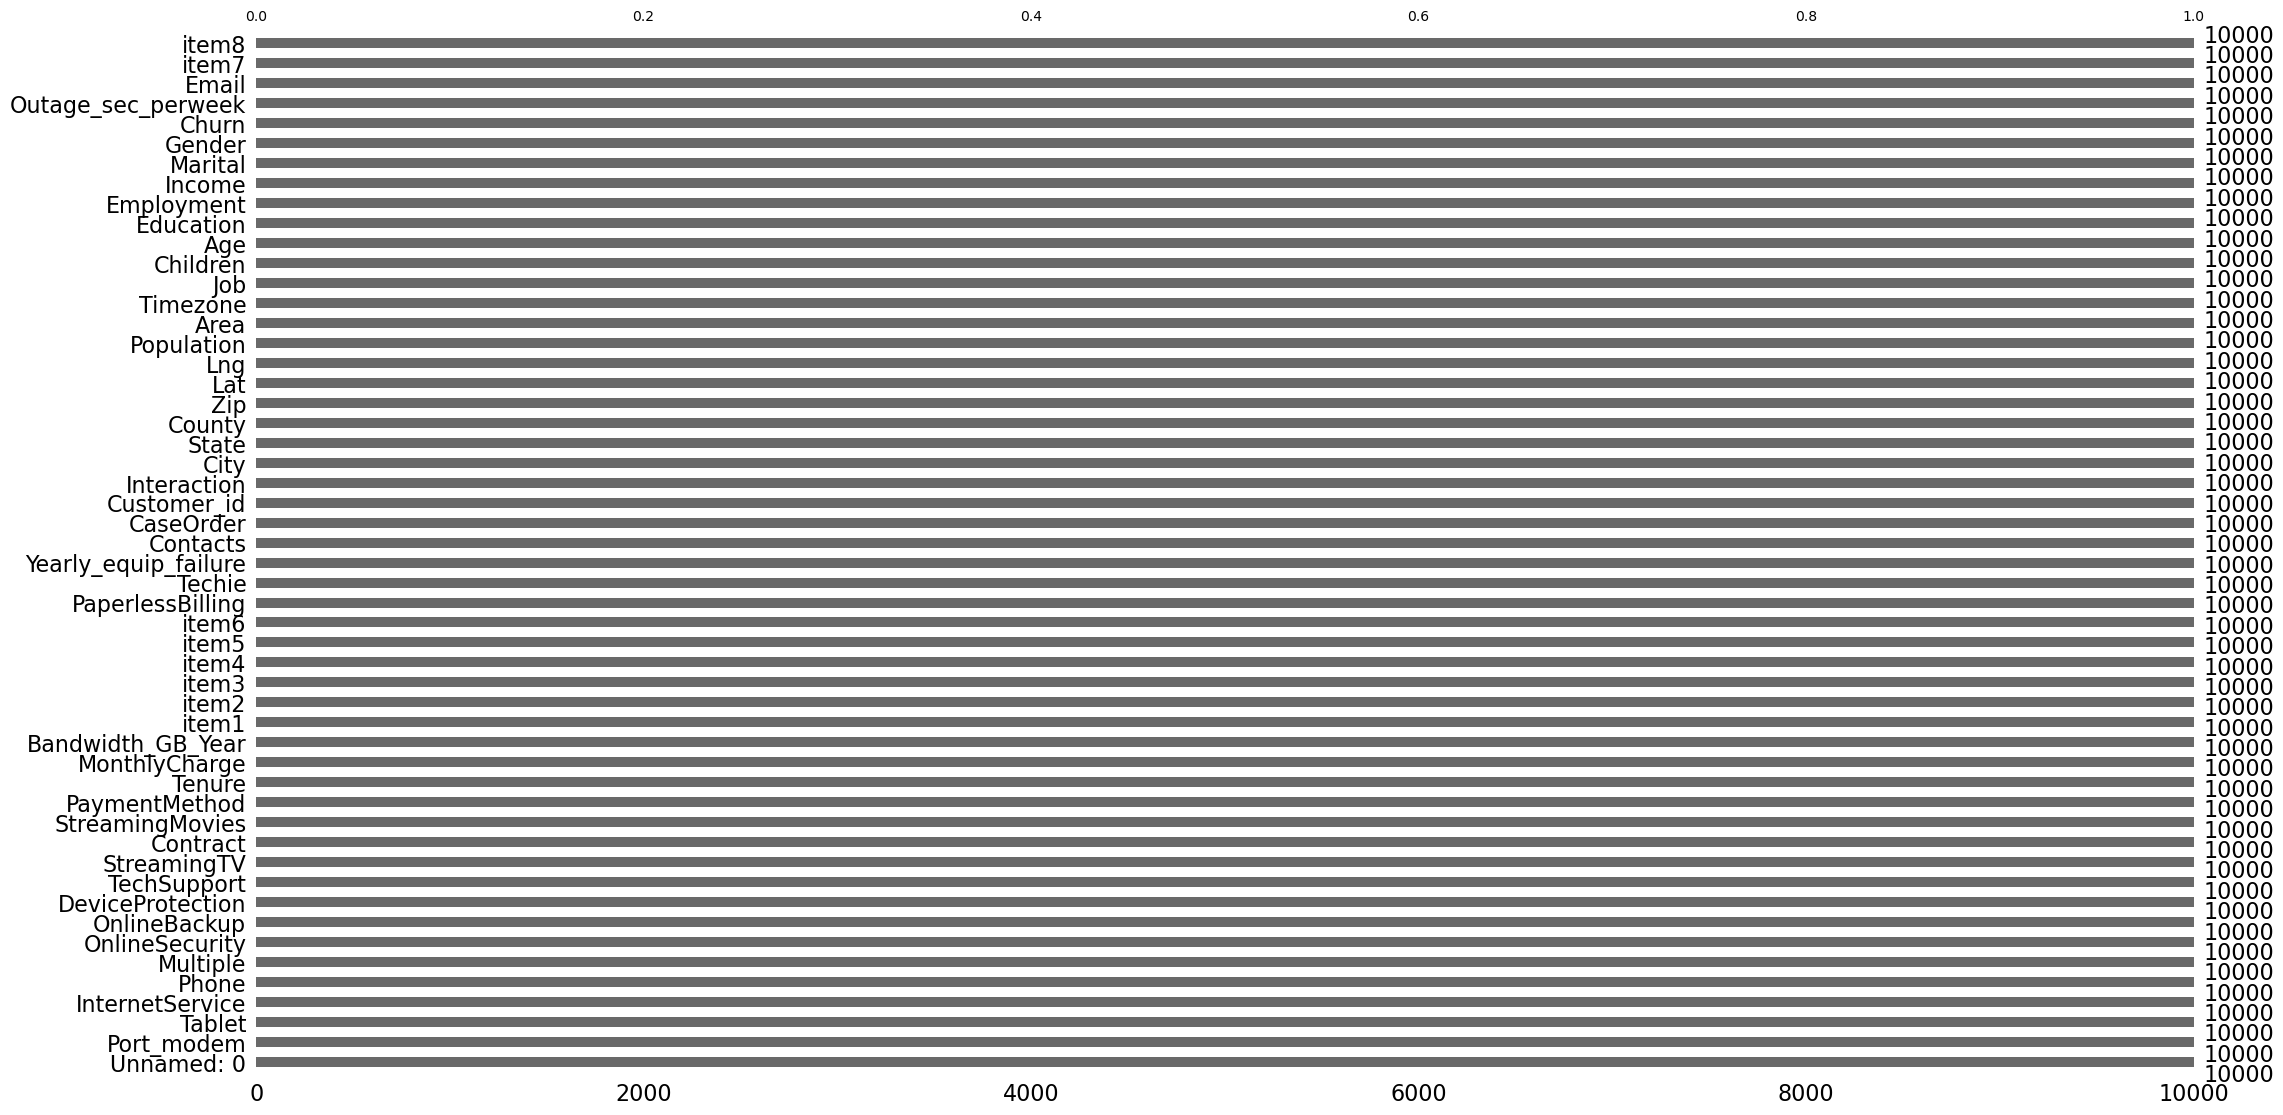

In [23]:
#data clean 
import matplotlib.pyplot as plt 
column_order = churn_clean_data.isnull().sum().sort_values().index
msno.bar(churn_clean_data[column_order])
plt.show()

In [24]:
churn_clean_data.describe()

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5000.50000,49153.319600,38.757567,-90.782536,9812.142828,1.887762,52.767278,39479.900705,11.452955,12.016000,0.994200,0.398000,34.624193,174.076305,3363.569891,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,2886.89568,27532.196108,5.437389,15.156142,14419.539901,1.999908,19.150472,25724.591626,7.025921,3.025898,0.988466,0.635953,25.903916,43.335473,2153.675868,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,1.00000,601.000000,17.966120,-171.688150,2.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,2500.75000,26292.500000,35.341828,-97.082812,778.000000,0.148795,37.000000,22120.185000,8.054362,10.000000,0.000000,0.000000,8.197844,141.071078,1244.222704,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,5000.50000,48869.500000,39.395800,-87.918800,2983.500000,1.000000,53.380744,33488.523060,10.202896,12.000000,1.000000,0.000000,36.852175,169.915400,3046.038041,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,7500.25000,71866.500000,42.106908,-80.088745,13221.250000,3.000000,68.000000,50601.906916,12.487644,14.000000,2.000000,1.000000,60.457955,203.777441,5508.571250,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000
